# Importing Necessary Libraries

In [5]:
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
plt.style.use('fivethirtyeight')

# Visualisation and Analysis

**Importing the data**

In [6]:
stock_cleaned_data=pd.read_csv('../data/stock_cleaned_data.csv', index_col = 0)

In [7]:
stock_cleaned_data.head()

,open,high,low,close,adjclose,volume
date,,,,,,
1999-11-01,136.500000,137.000000,135.562500,135.562500,88.217185,4006500
1999-11-02,135.968704,137.250000,134.593704,134.593704,87.586742,6516900
1999-11-03,136.000000,136.375000,135.125000,135.500000,88.176513,7222300
1999-11-04,136.750000,137.359299,135.765594,136.531204,88.847568,7907500
1999-11-05,138.625000,139.109299,136.781204,137.875000,89.722043,7431500


**Plot the stock price graph**

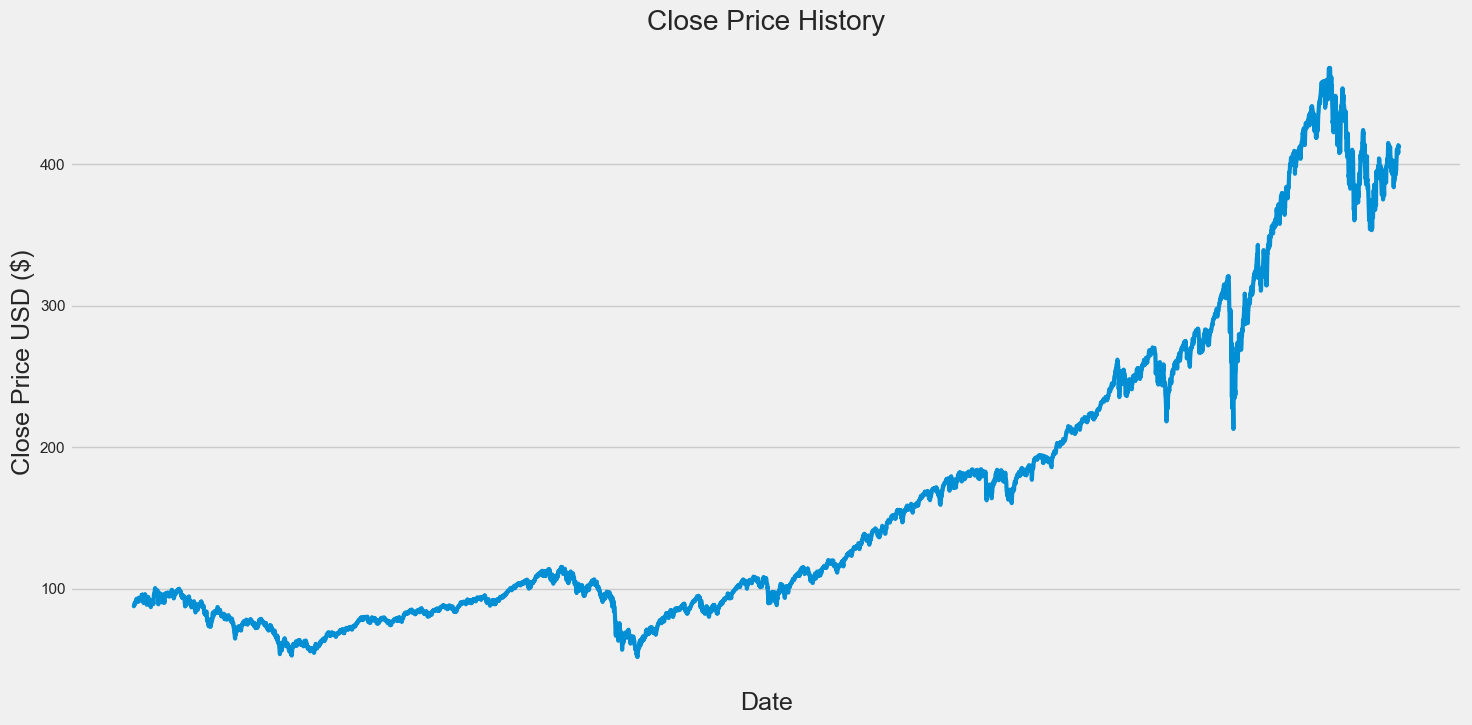

In [8]:
#plot the stock price graph
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(stock_cleaned_data['adjclose'], linewidth=3)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.xticks([])
plt.show()

**Volume distribution**

<Axes: xlabel='volume', ylabel='Count'>

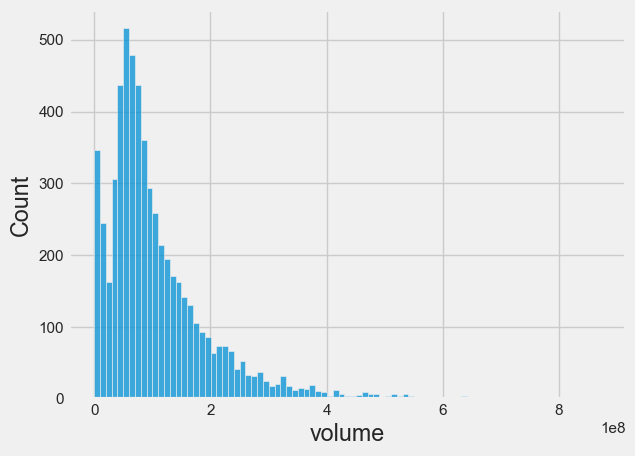

In [9]:
sns.histplot(x='volume', data=stock_cleaned_data)

**Relationship of volume and adjacent close price**

Correlation Coefficient: -0.13274584140618198


Text(16.33333333333333, 0.5, 'Volume')

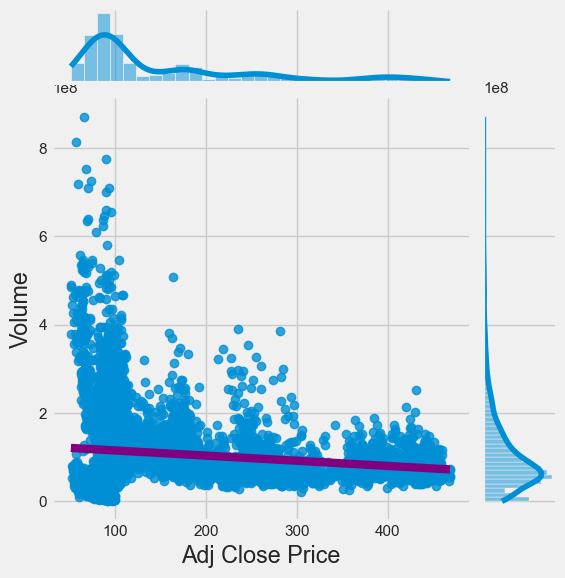

In [10]:
corr_coeff = stock_cleaned_data['volume'].corr(stock_cleaned_data['adjclose'])
print('Correlation Coefficient:', corr_coeff)

sns.jointplot(x='adjclose', y='volume', data=stock_cleaned_data, kind='reg', 
              line_kws={'color': 'purple'})

plt.xlabel('Adj Close Price')
plt.ylabel('Volume')

There is little to no relationship between adjacent closing price and volume

**Relationship of volume and range of data in a day**

Correlation Coefficient: 0.20952449585622854


Text(16.33333333333333, 0.5, 'Volume')

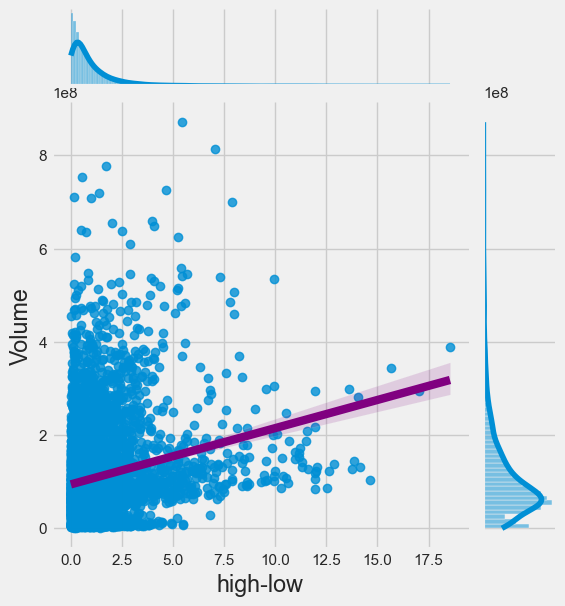

In [11]:
corr_coeff = stock_cleaned_data['volume'].corr(stock_cleaned_data['high'] - stock_cleaned_data['close'])
print('Correlation Coefficient:', corr_coeff)

sns.jointplot(x=stock_cleaned_data['high'] - stock_cleaned_data['close'], y='volume', data=stock_cleaned_data, kind='reg', 
              line_kws={'color': 'purple'})

plt.xlabel('high-low')
plt.ylabel('Volume')

There is little to no relationship between volume and range of price during the day

**Ploting the probability density of price changes and absolute of price changes**

In [12]:
EDA_data = pd.DataFrame(stock_cleaned_data['adjclose'])
EDA_data['next adjclose'] = stock_cleaned_data['adjclose'].shift(-1)
EDA_data.dropna(inplace = True)

EDA_data['difference'] = EDA_data['next adjclose'] - EDA_data['adjclose']
EDA_data['abs difference'] = abs(EDA_data['next adjclose'] - EDA_data['adjclose'])
EDA_data.head()

,adjclose,next adjclose,difference,abs difference
date,,,,
1999-11-01,88.217185,87.586742,-0.630443,0.630443
1999-11-02,87.586742,88.176513,0.589771,0.589771
1999-11-03,88.176513,88.847568,0.671055,0.671055
1999-11-04,88.847568,89.722043,0.874474,0.874474
1999-11-05,89.722043,89.803386,0.081344,0.081344


In [13]:
print("The max price difference/ price change is:", EDA_data['abs difference'].max())

The max price difference/ price change is: 27.970883918597025


<Axes: xlabel='difference', ylabel='Density'>

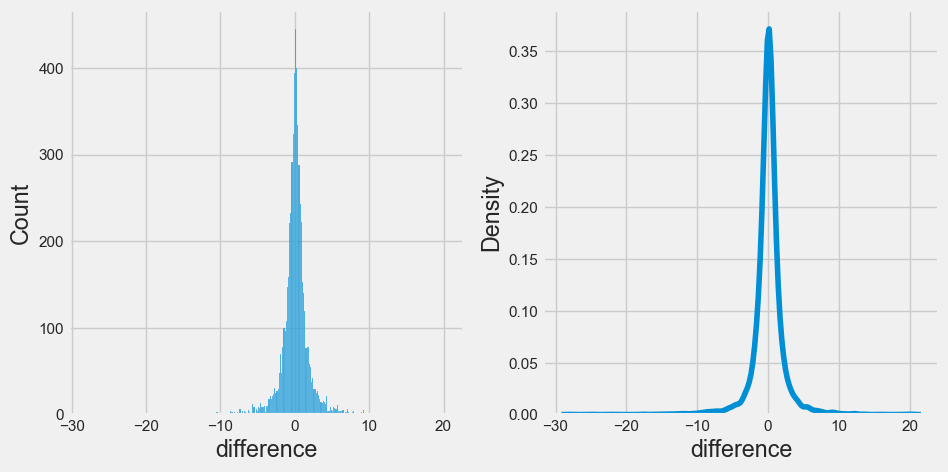

In [14]:
fig, axs = plt.subplots(ncols=2, figsize=(10, 5))
sns.histplot(data = EDA_data, x = 'difference', ax = axs[0])
sns.kdeplot(data = EDA_data, x = 'difference', ax = axs[1])

The distribution of price changes exhibit normal distribution. This is a demonstration of stock prices following the gaussian random walk

<Axes: xlabel='abs difference', ylabel='Density'>

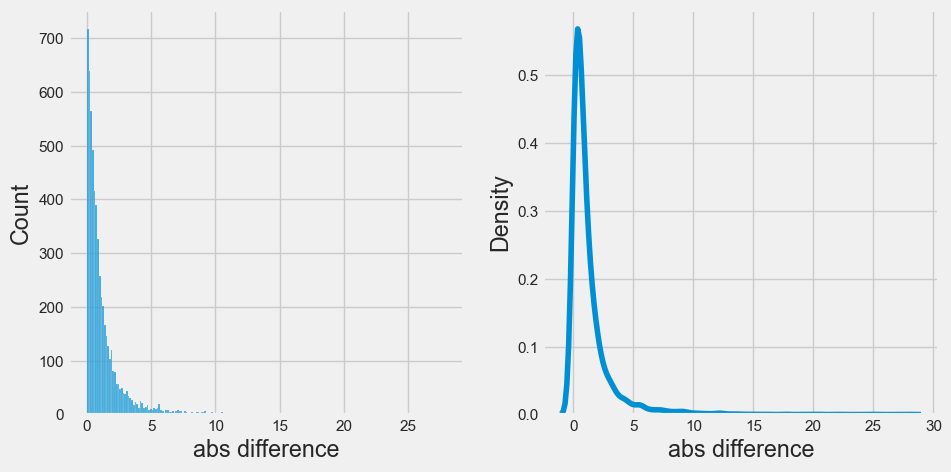

In [15]:
fig, axs = plt.subplots(ncols=2, figsize=(10, 5))
sns.histplot(data = EDA_data, x = 'abs difference', ax = axs[0])
sns.kdeplot(data = EDA_data, x = 'abs difference', ax = axs[1])

**Ploting the stock prices using plotly**

In [ ]:
import plotly.graph_objects as go
from datetime import datetime

fig = go.Figure(data=[go.Candlestick(x=stock_cleaned_data.index,
                open=stock_cleaned_data['open'],
                high=stock_cleaned_data['high'],
                low=stock_cleaned_data['low'],
                close=stock_cleaned_data['close'])])

fig.show()